<a href="https://colab.research.google.com/github/niklaust/Deep_Learning/blob/main/pytorch_fundamentals_notebook_of_niklaust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>PyTorch Fundamentals</b></center></h1>

github:niklaust

freeCodeCamp: https://www.youtube.com/watch?v=V_xro1bcAuA

Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

teacher : https://github.com/mrdbourke/pytorch-deep-learning


start 20221007

#<center><b>Chapter 0 - PyTorch Fundamentals</b></center>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.12.1+cu113


##Introduction to Tensors




**Creating tensors**

PyTorch tensors are created using 

> `torch.tensor()` 


Torch.tensor - https://pytorch.org/docs/stable/tensors.html

**Scalar** : a quantiy having magnitude, not direction.

In [ ]:
# scalar
scalar = torch.tensor(4)
scalar

tensor(4)

In [ ]:
scalar.ndim

0

In [ ]:
# Get tensor back as Python int
scalar.item()

4

**Vector** : a quantity having a direction as well as magnitude

In [ ]:
# vector
vector = torch.tensor([4,4]) 
vector

tensor([4, 4])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

**Matrix**: a set of numbers arranged in **rows** and **columns** so as to form a rectangular array.

In [ ]:
# MATRIX
MATRIX = torch.tensor([[1, 4],
                      [8, 7]])
MATRIX

tensor([[1, 4],
        [8, 7]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([1, 4])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

**Tensor**: a mathematical object analogous to but more general than a vector represented by an array of components that are functions of the coordinates or a space

In [ ]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [2, 4, 6],
                        [3, 6, 9]]])
TENSOR

tensor([[[1, 2, 3],
         [2, 4, 6],
         [3, 6, 9]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape  # count from outside bracket to inside

torch.Size([1, 3, 3])

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [2, 4, 6],
        [3, 6, 9]])

In [ ]:
MyTENSOR = torch.tensor([[[1, 2, 3],[2, 4, 6],[3, 6, 9]],
                         [[-1, -2, -3],[-2, -4, -6],[-3, -6, -9]]])

MyTENSOR

tensor([[[ 1,  2,  3],
         [ 2,  4,  6],
         [ 3,  6,  9]],

        [[-1, -2, -3],
         [-2, -4, -6],
         [-3, -6, -9]]])

In [ ]:
MyTENSOR.ndim

3

In [ ]:
MyTENSOR.shape

torch.Size([2, 3, 3])

In [ ]:
MyTENSOR[1]

tensor([[-1, -2, -3],
        [-2, -4, -6],
        [-3, -6, -9]])

In [ ]:
MyTENSOR[0][0]

tensor([1, 2, 3])

## Random tensors


**Random tensors** are impportant because the way many **neural networks** learn is that they **start with tensors** full of random numbers and then adjust those random number to better represent the data.

> `Start with random numbers -> look at data -> update random numbers -> look at data -> undate random numbers`


Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.6355, 0.2403, 0.7142, 0.1145],
        [0.9222, 0.9380, 0.0487, 0.3660],
        [0.6850, 0.5123, 0.9510, 0.2401]])

In [ ]:
random_tensor.ndim

2

In [ ]:
random_tensor.shape

torch.Size([3, 4])

In [ ]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3, 224, 224)) # height, width, color channels
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

In [ ]:
My_random_image_size_tensor = torch.rand(size=(3, 1920, 1080))
My_random_image_size_tensor.shape, My_random_image_size_tensor.ndim

(torch.Size([3, 1920, 1080]), 3)

##Zeros and Ones

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
zeros*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# create a tensor of all ones
ones = torch.zeros(size=(3, 4))
ones

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
ones.dtype

torch.float32

In [ ]:
random_tensor.dtype

torch.float32

## Crating a Range of Tensors and Tensors-like

In [ ]:
# Use torch.range() and get deprecated message, use torch.arange()
one_to_ten = torch.arange(start=0, end=11, step=1)
one_to_ten

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten) 
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##Tensor Datatypes

**Note:** **Tensor datatype** is one of the 3 big erros you will run into with PyTorch & deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensor not on the right device

Precision in computing - https://en.wikipedia.org/wiki/Precision_(computer_science)

In [ ]:
# Float 32 tensor 
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], 
                               dtype=None, # what datatype is tensor (e.g. float32 or float16)
                               device=None, # what device is you tensor on (e.g. "cpu", "cuda")
                               requires_grad=False) # whether or not to rack gradients with this tensors operation
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype

torch.float32

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor*int_32_tensor

tensor([ 9., 36., 81.])

## Getting information from tensors

1. Tensors not right datatype - to get dataype from tensor, can use `tensor.dtype`
2. Tensors not right shape - to get shape form a tensor, can use  `tensor.shape`
3. Tensor not on the right device - to get device from a tensor, can use `tensor.device`

In [ ]:
# Create a tensor 
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.8882, 0.0924, 0.9764, 0.8247],
        [0.3587, 0.8667, 0.7768, 0.0614],
        [0.4516, 0.7853, 0.9973, 0.0744]])

In [ ]:
some_tensor.shape

torch.Size([3, 4])

In [ ]:
some_tensor.size()

torch.Size([3, 4])

In [ ]:
# Find out details about some tensor (tensor.attribute)
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.8882, 0.0924, 0.9764, 0.8247],
        [0.3587, 0.8667, 0.7768, 0.0614],
        [0.4516, 0.7853, 0.9973, 0.0744]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


In [ ]:
my_tensor = torch.rand(4, 5)
my_tensor

tensor([[0.9766, 0.7515, 0.5124, 0.1972, 0.7783],
        [0.3039, 0.3961, 0.8933, 0.4885, 0.8205],
        [0.9987, 0.4243, 0.5220, 0.7780, 0.2184],
        [0.1918, 0.8402, 0.0065, 0.5877, 0.2477]])

In [ ]:
my_tensor = my_tensor.type(torch.int16)

In [ ]:
print(f"Datatype of my_tensor {my_tensor.dtype}")
print(f"Shape of my_tensor {my_tensor.shape}")
print(f"Device my_tensor is on{my_tensor.device}")

Datatype of my_tensor torch.int16
Shape of my_tensor torch.Size([4, 5])
Device my_tensor is oncpu


## Manipulating Tensors (tensor operations)

Tensor operations include:
* Addition
* Subtraction 
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 100

tensor([101, 102, 103])

In [ ]:
# Multiply tensor by 10
tensor * 10

tensor([10, 20, 30])

In [ ]:
# Subtract 10
tensor - 10

tensor([-9, -8, -7])

In [ ]:
# Try out PyTorch in-built functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [ ]:
torch.add(tensor, 10)

tensor([11, 12, 13])

## Matrix multiplication



Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

More information on multiplying matrices - https://www.mathsisfun.com/algebra/matrix-introduction.html


There are two main rules that performing matrix multiplication needs to satisfy:
1. The **inner dimensions** must match:
* `(3, 2) @ (3, 2)` won't work
* `(2, 3) @ (3, 2)` will work
* `(3, 2) @ (2, 3)` will work

2. The resulting matrix has the shape of the **outer dimensions**
* `(2, 3) @ (3, 2)` -> `(2, 2)`
* `(3, 2) @ (2, 3)` -> `(3, 3)`

Matrix Multiplication - http://matrixmultiplication.xyz/

In [ ]:
# torch.matmul(torch.rand(3, 2), torch.rand(3, 2)) error
torch.matmul(torch.rand(2, 3), torch.rand(3, 2))


tensor([[0.8554, 0.5357],
        [0.8922, 0.6269]])

In [ ]:
torch.matmul(torch.rand(3, 2), torch.rand(2, 3))

tensor([[1.0243, 0.7512, 0.0660],
        [0.7697, 0.6206, 0.0460],
        [0.8313, 0.7580, 0.0441]])

In [ ]:
# Element wise multiplication
print( tensor, "*", tensor)
print(f"Equals: {tensor*tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor)  # 14; (1*1)+(2*2)+(3*3)

tensor(14)

In [ ]:
# Matrix multiplication by hand
1*1 + 2*2 + 3*3

14

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 3.69 ms, sys: 0 ns, total: 3.69 ms
Wall time: 4.37 ms


In [ ]:
%%time
torch.matmul(tensor, tensor)  # faster then multiplication by hand

CPU times: user 41 µs, sys: 5 µs, total: 46 µs
Wall time: 50.5 µs


tensor(14)

## One of the most common erros in deep learning: shape errors

In [ ]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1, 2],
                        [3, 4],
                        [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

To fix our tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**.

A **transpose** switches the axes or dimension of a given tensor.

In [ ]:
tensor_A, tensor_A.shape

(tensor([[1, 2],
         [3, 4],
         [5, 6]]), torch.Size([3, 2]))

In [ ]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]), torch.Size([3, 2]))

In [ ]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]), torch.Size([2, 3]))

In [ ]:
a00 = 1*7 + 2*10
a01 = 1*8 + 2*11
a02 = 1*9 + 2*12
a10 = 3*7 + 4*10
a11 = 3*8 + 4*11
a12 = 3*9 + 4*12
a20 = 5*7 + 6*10
a21 = 5*8 + 6*11
a22 = 5*9 + 6*12

A = torch.tensor([[a00, a01, a02],
                  [a10, a11, a12],
                  [a20, a21, a22]])
print(A)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


In [ ]:
# The matrix multiplication operation works when tensor_B is transposed
print(f"Original shape : tensor_A = {tensor_A.shape},                       tensor_B = {tensor_B.shape}")
print(f"New shapes     : tensor_A = {tensor_A.shape} (same shape as above), tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying    : {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimension must match")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}") # inner dimension must match, the new shape is equal to outer dimension

Original shape : tensor_A = torch.Size([3, 2]),                       tensor_B = torch.Size([3, 2])
New shapes     : tensor_A = torch.Size([3, 2]) (same shape as above), tensor_B.T = torch.Size([2, 3])
Multiplying    : torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimension must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


##Finding the min, max, mean, sum, etc (tensor aggregation)

In [ ]:
# Create a tensor 
x = torch.arange(1, 100, 10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [ ]:
# Find the min
torch.min(x), x.min()

(tensor(1), tensor(1))

In [ ]:
# Find the max
torch.max(x), x.max()

(tensor(91), tensor(91))

In [ ]:
# Find the mean - note: the torch.mean() function requires a tensor of float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [ ]:
torch.mean(x, dtype=torch.float32)

tensor(46.)

In [ ]:
# Find the sum
torch.sum(x), x.sum()

(tensor(460), tensor(460))

## Finding the positional min and max

In [ ]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [ ]:
# Find the position in tensor that has the minimum value with argmin() -> returns index position of target tensor where the minimum value occurs
x.argmin()

tensor(0)

In [ ]:
x[0]

tensor(1)

In [ ]:
# Find the position in tensor that has the maximum value with argmax() -> returns index position of target tensor where the maximum value occurs
x.argmax()

tensor(9)

In [ ]:
x[9], x[-1]

(tensor(91), tensor(91))

## Reshaping, stacking, squeezing and unsquezzing 

* Reshaping - reshapes an input tensor to a defined shape
* View - return a view of an input tensor of certain shape but keep tthe same as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) แนวตั้ง or side by side (hstack) แนวนอน
* Squeeze - remove all '1' dimensions from a tensor
* Unsqueeze - add a '1 dimension to a target tensor
* Permute - return a view of the input wiht dimensions permuted (swapped) in a certain way

In [ ]:
# Let's create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Change the view
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Changing z changes x (because a view of a tensor shares the same memory as the original tensor )
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# vstack
x_vstack = torch.vstack([x, x])
x_vstack

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# hstack
x_hstack = torch.hstack([x, x])
x_hstack

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9., 5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
# torch.squeeze() - remove all single dimension from a target tensor
print(f"Previous tensor   : {x_reshaped}")
print(f"Previous shape    : {x_reshaped.shape}")

# Remove extra dimensions from x_reshaped
x_squeezed  = x_reshaped.squeeze()
print(f"\nNew tensor        : {x_squeezed}")
print(f"New shape         : {x_squeezed.shape}")

Previous tensor   : tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape    : torch.Size([1, 9])

New tensor        : tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape         : torch.Size([9])


In [ ]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimension)
print(f"Previous target    : {x_squeezed}")
print(f"Previous shape     : {x_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor         : {x_unsqueezed}")
print(f"New shape          : {x_unsqueezed.shape}")


Previous target    : tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape     : torch.Size([9])

New tensor         : tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape          : torch.Size([1, 9])


In [ ]:
# torch.permute - rearranges the dimensions of a target tensor to a specified order
x_original = torch.rand(size=(224, 224, 3)) # [height, width, color_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}") # [color_channels, height, width]

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
x_original[223, 223, 1]

tensor(0.0904)

In [ ]:
x_original[0, 0, 0] = 123456
x_original[0, 0, 0], x_permuted[0, 0, 0]

(tensor(123456.), tensor(123456.))

## Indexing (selecting data from tensors)



Indexing with PyTorch is similar to indexing with NumPy

In [ ]:
# Crate a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor
x[0] 

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Let's index on the middle bracket (dim =1)
x[0][0]

tensor([1, 2, 3])

In [ ]:
# Let's index on the most innner bracket (last dimension)
x[0][0][0]

tensor(1)

In [ ]:
# size tell how many dimensions in the tensor but when we select element from tensor we have to start from index 0
x[0][2][2]

tensor(9)

In [ ]:
# You can also use ":" to select "all" of a target dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [ ]:
# Index on x to return 9
x[0, -1, -1]

tensor(9)

In [ ]:
# Index on x to return 3, 6, 9

x[:, :, -1]

tensor([[3, 6, 9]])

## PyTorch tensors & NumPy




NumPy is a popular scientific Python numerical computing library

And because of this, PyTorch has functionality ot interact with it.

* Data in NumPy, want in Pytorch tensor -> `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [ ]:
# Numpy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)  # dtype=np.float32
tensor = torch.from_numpy(array) #.type(torch.float32) When converting from numpy-> pytorch, pytorch reflects numpy's default dataype of float64 unless specifly otherwise 
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Change the value of array, what will this do to `tensor`?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Tensor (default dtype=float32) to NumPy array (default dtype=float64) 
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()  # numpy made from tensor
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
# Change the tensor, what happens to `numpy`
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

##Reproducbility (trying to take random out of random)

In short how a neural network learns:

`start with random number -> tensor operations -> update random numbers to try and make then better representations of the data -> again -> again -> again...`

To reduce the randomness in neural networks and PyTorch comes to concept of a **random seed**.

Essentially what the random seed does is "flavor" the randomness.

Extra resources for reproduciblility:
* https://pytorch.org/docs/stable/notes/randomness.html
* https://en.wikipedia.org/wiki/Random_seed

In [ ]:
import torch 

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.6392, 0.4777, 0.0920, 0.4503],
        [0.8971, 0.6316, 0.2712, 0.8621],
        [0.9602, 0.0114, 0.4591, 0.7761]])
tensor([[0.4590, 0.9683, 0.5687, 0.6708],
        [0.5253, 0.7968, 0.6614, 0.7765],
        [0.9048, 0.6285, 0.5108, 0.3620]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reprocubible tensors
import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on the GPUs (and making faster computations)



GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory (good).

### 1. Getting a GPU

1. Easiest - Use Google Colab for a free GPU (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's lots of options..., see this post for what option to get https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them

For 2, 3 PyTorch + GPU drivers (CUDA) takes a little bit of setting up, to do this refer to PyTorch setup documentation: https://pytorch.org/get-started/locally/

In [ ]:
!nvidia-smi

Thu Nov 10 16:18:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###2. Check for GPU access with PyTorch

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#best-practices

E.g. run on GPU if available, else defualt to CPU

In [ ]:
# check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

###3. Putting tensors (and models) on the GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [ ]:
# Create a tensor (default on the CPU) 
tensor = torch.tensor([1, 2, 3]) # device="cuda", "cpu"

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu
                          

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU



In [ ]:
# if tensor is on GPU, can't transform it to NumPy
# tensor_on_gpu.numpy() TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

#<center><b>Chapter 1 - PyTorch Workflow</b></center>

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'1.12.1+cu113'

In [ ]:
What_were_covering =  {1: "data (prepare and load)",
                       2: "build model",
                       3: "fitting the model to data (training)",
                       4: "making predicitons and evalutating a model (infeence)",
                       5: "saving and loading a model",
                       6: "putting it all together"}

What_were_covering                       

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predicitons and evalutating a model (infeence)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

##1. Data(preparing and loading)

Data con be almost anything... in machine learning.

* Excel speadsheet
* Images of any kind
* Video (YouTube has lost of data...)
* Audio like songs or podcasts
* DNA 
* Text
* Chemical compound (fragrance, odor)


Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a modl to learn patterns in that numerical representation.


To showcase this, let's create some *known* data using the linear regression formula.

We' ll use a linear regression formular to make a straight line with *known* **parameter**

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1 
step = 0.02
X =  torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze to add extra dimension
y = weight * X + bias # linear

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
 len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)



Let' create a traing and test set with our data.

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!?

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions" )
  
  # Show the legend
  plt.legend(prop={"size":14});

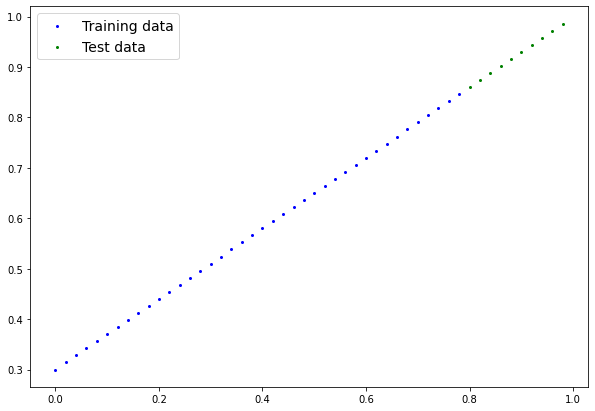

In [ ]:
plot_predictions();

## 2. Build model 



Our first PyTorch model!

This is very exciting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to de so you can use the following resource for Real Python: https://realpython.com/python3-object-oriented-programming/


What our model does:
* Start with radom values (weight & bias)
* Look at traning data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias value we used to create the data)


How does it do so?

Throught two main algorithms:
1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [ ]:
from torch import nn

# Crate linear regression model class
class LinearRegressionModel(nn.Module):  # <- almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    # Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be update via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    
    self.bias = nn.Parameter(torch.randn(1,  # <- start with a random bias and try to adjust it to the ideal bias 
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


**Explanation about The code above**

- Subclass `nn.Module` (this contains all the building blocks for neural networks)

- Initialise *model parameters* to be used in various computations (these could be differetnt layers from torch.nn, single parameters, hard-coded values or functions)

- `requires_grad=True` means PyTorch will track the gradients of this specific parameters for use with torch.autograd and gradient descent (for many `torch.nn` modules, `requires_grad=True` is set by default)

- Any subclass of `nn.Module needs` to override `forward()` (this defines the forward computation of the model) 

### PyTorch model building essentials

* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be consider a computational graph )
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


See more of these essential module via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Checkin the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can chek or model parameters or what's inside our model using. `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predict `y_test` based on `X-test`

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode(): 
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred 
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

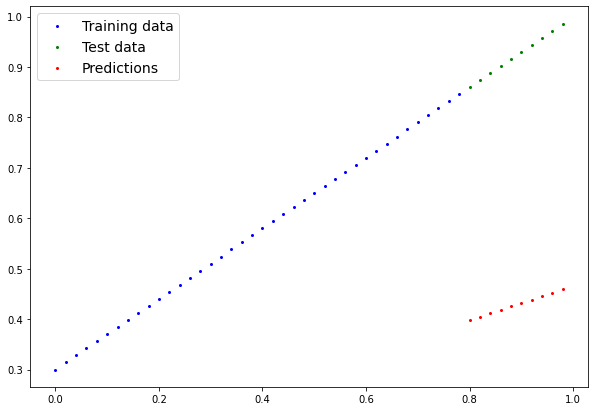

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model 

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *know* parameters.

Or in other words from a poor representation of the data to a better representation of the data.


One way to measure how poor or  how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we' re going to refer to it as a loss function. 

Things we need to train:

* **Loss fuction:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function -https://pytorch.org/docs/stable/optim.html#module-torch.optim

  * inside the optimizer you'll often have to set two parameters:
   * `params` - the model parameters you'd like to optimizer or exampple params=model_0.parameters()
   * `lr`(learning rate) -the learning rate is a hyperparameter hat defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes) 

And specifically for PyTorch, we need:
* A training loop
* A testing loop

see more on loss fuction here: https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

MAE_loss = torch.mean(torch.abs(y_pred-y_test))

MAE_loss = torch.nn.L1Loss

mean absolute error- หาค่าเฉลี่ยของค่าสัมบูรณ์ของผลต่าง

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function 
loss_fn = nn.L1Loss()


# Setup an optimizer (stochatic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [ ]:
loss_fn

L1Loss()

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your paticular problem set.

For example, for **a regression problem**(like ours), a loss fuction of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for **a classificaiton problem** like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make preidictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagration** - https://www.youtube.com/watch?v=tIeHLnjs5U8)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**- https://www.youtube.com/watch?v=IHZwWFHWa-w)

In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
torch.manual_seed(42)

# An epoch is one loop throuh the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Set up empty list to keep track of model progress
# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training loop code here ###
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model o training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calcualte the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by defualt how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing start ###
  # Put the model in evaluation mode
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  
  # Turn on inference mode context manager
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes https://twitter.com/PyTorch/status/1437838231505096708
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  
  # Print out what's happpenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")  

  # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428 
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688 
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703 
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106 
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024 
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135 
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

**Explanation of training (optimization) loop**


* step 0: pass the data through the model for a number of **epochs** (e.g. 100 for 100 passes of the data)
* step 1: pass the data through the model, this will perform the `forward()` method located with the model object
* step 2: **calculate the loss value** (how wrong the model's predictions are)
* step 3: **Zero the optimizer gradients** (they accumulate every epoch, zero them to start fresh each forward pass)
* step 4: Perform **backpropagation** on the loss fuction (compute the gradient of every parameter with requires_grad=True)
* step 5: **Step the optimizer** to update the model's parameters with respect to the gradients calculated by loss.bakward()

**Explanation of Testing loop**

* **Setup empty losts to keep track of model progress:** Create empy lists for storing useful values (helpful for tracking model progress)
* **Put the model in evaluation mode:** Tell the model we want to evaluate rather than train (this turns off functionality used for training but not evaluation)
* **Turn on inference mode contest manager:** Turn on `torch.inference_mode()` contest manager to disable functionality such as gradient tracking for inference (gradient tracking not needed for inference) 
* **1. Forward pass on test data:** Pass the test data through the model(this will call the model's implemented `forward()`
* **2. Calculate loss on test data:** Calculate the test loss value (how wrong the model's predictions are on the test dataset, lower is better)
* **Print out what's happening every 10 epochs:** Displaying information outputs for how the model is doing during training/testing ever ~10 epochs(note: what gets printed out here canbe adjusted for specific problems)

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

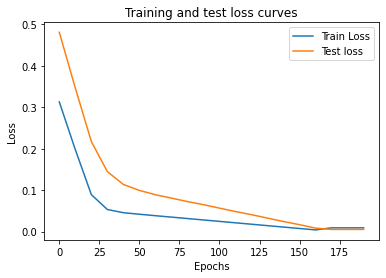

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


PyTorch optimization loop song

Author: Daniel Bourke

</br>

It's train time!

do the forward pass, 

calculate the loss, 

optimizer zero grad,

lossss backwards! 


</br>

Optimizer step step step

</br>

Let's test now!

with torch no grad:

do the forward pass,

calculate the loss,

watch it go down down down!



In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

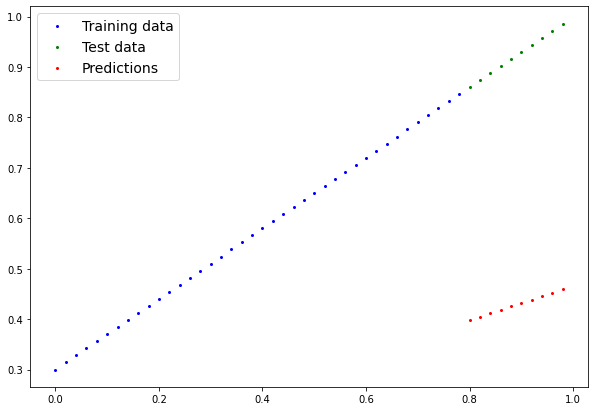

In [ ]:
plot_predictions(predictions=y_preds);

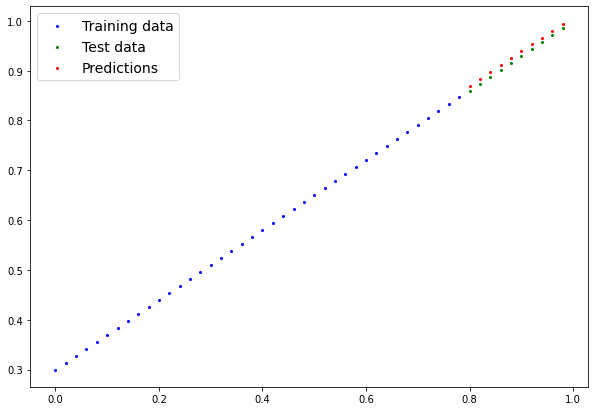

In [ ]:
plot_predictions(predictions=y_preds_new);

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create models save path
MODEL_NAME = "01_pythorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pythorch_workflow_model_0.pth


##4. Saving a model in PyTorch

There are three main methods you should about for saving and loading model PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format https://docs.python.org/3/library/pickle.html
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` = this allows to load a model 's saved state dictionary

PyTorch save & load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models

In [ ]:
! ls -l models 

total 4
-rw-r--r-- 1 root root 1063 Nov 10 16:19 01_pythorch_workflow_model_0.pth


##5. Loading a PyTorch model



Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load  the saved `state_dict()` in to that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds  

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds  

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putiting it all together


Let's go back through the steps above and see it all in one place.

In [ ]:
# Import PyTorch and matplotlib
import  torch
from torch import nn
import matplotlib.pyplot as plt


# Check PyTorch version
torch.__version__

'1.12.1+cu113'

Create device-agnostic code.

This mean if you've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


###6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X  + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (feature and lables)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze error will pop up
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions" )
  
  # Show the legend
  plt.legend(prop={"size":14});

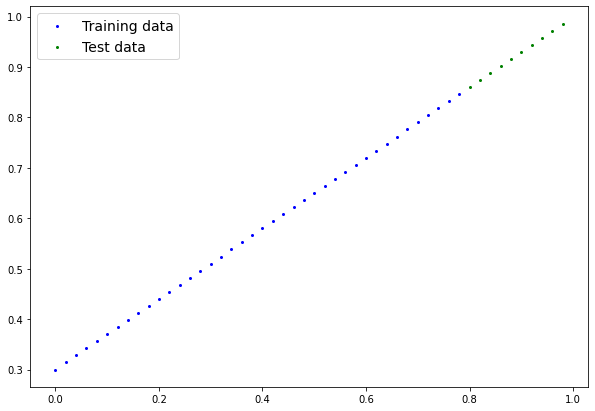

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will be error
plot_predictions(X_train, y_train, X_test, y_test)

###6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for crating the model parameters / also called: linaer transform, probing layer, fully connected layer, dense layer(tensorflow)
    self.linear_layer = nn.Linear(in_features=1, 
                                  out_features=1)
    
  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

# Set the manual seed
torch.manual_seed(42)    
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Cheack the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer 
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizre
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnotic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing 
  model_1.eval() 
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

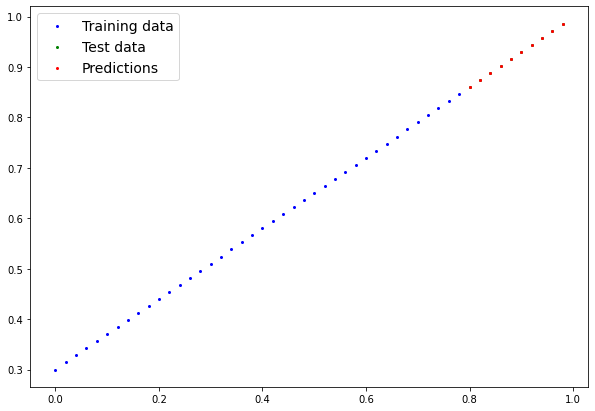

In [ ]:
# Cheack out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. Crate models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

#<center><b>Chapter 2 - Neural Network Classification</b></center>

**What We're going to cover**

* Architecture of a neural network **classificaiton** model
* Input shapes and output shapes of a **classification** model(features and lables)
* Creating custom data to view, fit on and predict on
* Steps in modeling
  
  * Creating a model, setting a loss function and optimiser, creating a training loop evaluating a model
* Saving and loading models
* Harnessing the poer of non-linearity
* Different **classificaiton** evaluation methods

**Architecture of a classification model**

<table>
  <tr>
    <th>Hyperparameter</th>
    <th>Binary Classification</th>
    <th>Multiclass classification</th>
  </tr>
  <tr>
    <td><b>Input layer shape</b> (in_features)</td>
    <td>Same as number of features (e.g. 5 for age, sex , height, weight, smoking status in heart disease prediction) </td>
    <td>Same as binary classification</td>
  </tr>
  <tr>
    <td><b>Hidden layer(s)</b></td>
    <td>Problem specific, minimum=1, maximum=unlimited</td>
    <td>Same as binary classification</td>
  </tr>
   <tr>
    <td><b>Neurons per hidden layer</b></td>
    <td>Problem specific, generally 10 to 512</td>
    <td>Same as binary classification</td>
  </tr>
   <tr>
    <td><b>Output layer shape</b>(out_features)</td>
    <td>1(one class or the other)</td>
    <td>1 per class(e.g. for food, person or dog)</td>
  </tr>  
  <tr>
    <td><b>Hidden layer activation</b></td>
    <td>Usually ReLU(rectified linear unit) but can be many other</td>
    <td>Same as binary classification</td>
  </tr>
  <tr>
    <td><b>Output activation</b></td>
    <td>Sigmoid(torch.sigmoid in PyTorch)</td>
    <td>Softmax(torch.softmax in PyTorch)</td>
  </tr>
   <tr>
    <td><b>Loss function</b></td>
    <td>Binary crossentropy(torch.nn.BCELoss in PyTorch)</td>
    <td>Cross entropy(torch.nn.CrossEntropy)</td>
  </tr>
   <tr>
    <td><b>Optimizer</b></td>
    <td>SGD(stochastic gradient descent), Adam(see torch.optim for more options)</td>
    <td>Same as binary classification</td>
  </tr> 
</table>  


**Neural Network classification with PyTorch**

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

Book version of this note - https://www.learnpytorch.io/02_pytorch_classification/

All other resources - https://github.com/mrdbourke/pytorch-deep-learning

## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"Frist 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Frist 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], 
                        "X2": X[:,1],
                       "label":y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

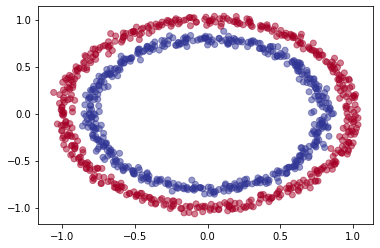

In [ ]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu, alpha=0.5);

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

for more about Toy dataset - https://scikit-learn.org/stable/datasets/toy_dataset.html

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and lables
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and crate train and test splits

In [ ]:
import numpy as np
import torch
torch.__version__

'1.12.1+cu113'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data into tensors 

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
torch.manual_seed(42)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Crate a training and test loop

Illustrate for how Neural Network work: https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,2&seed=0.78319&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've set device agnostic code, let's crate a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y) 

    ### or use nn.Sequential
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, X): 
    return self.layer_2(self.layer_1(X)) # X -> layer_1 -> layer_2 -> output
    # return two_linear_layers(X) # pass it to nn.Sequential

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)   
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy (cross entropy ).

As a remider, the loss function measures how *wrong* you models prediction are.

And for optimizers, two of the most common and useful are SGD and Adam
PyTorch has many built-in options.

* For some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a definition on what a logit is in deep learning - https://stackoverflow.com/a/52111173

* For different optimizers see `torch.optim`

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation build-infunction

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model



To train our model, we' re going to need to build training loop with the following step:

1. Forward pass
2. Calculate the loos
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from row logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

the output below are called **logits**: the raw output of our model without being pass through any activation function.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabiblitites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs 

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred lables)
y_pred_lables = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_lables.squeeze()))

# Get rid of extra diemnsion
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a trainng and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)  # for every time we run, the output still the same 

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training 
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred lables

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction "probabilities" as input
  #                y_train)
  
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects "raw" logits as input
                 y_train)
  
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print out what's happening'
    if epoch % 10 == 0:
      print(f"Epoch : {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch : 0 | Loss: 0.69796, Acc: 51.88% | Test loss 0.69440, Test acc: 58.00%
Epoch : 10 | Loss: 0.69590, Acc: 51.25% | Test loss 0.69305, Test acc: 53.00%
Epoch : 20 | Loss: 0.69490, Acc: 51.62% | Test loss 0.69254, Test acc: 49.50%
Epoch : 30 | Loss: 0.69435, Acc: 51.12% | Test loss 0.69236, Test acc: 49.50%
Epoch : 40 | Loss: 0.69401, Acc: 50.88% | Test loss 0.69232, Test acc: 51.00%
Epoch : 50 | Loss: 0.69378, Acc: 50.25% | Test loss 0.69234, Test acc: 50.00%
Epoch : 60 | Loss: 0.69362, Acc: 50.00% | Test loss 0.69239, Test acc: 51.50%
Epoch : 70 | Loss: 0.69351, Acc: 50.25% | Test loss 0.69246, Test acc: 51.00%
Epoch : 80 | Loss: 0.69342, Acc: 49.88% | Test loss 0.69254, Test acc: 50.00%
Epoch : 90 | Loss: 0.69336, Acc: 49.88% | Test loss 0.69262, Test acc: 53.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
from pathlib  import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary    

helper_functions.py already exists, skipping download


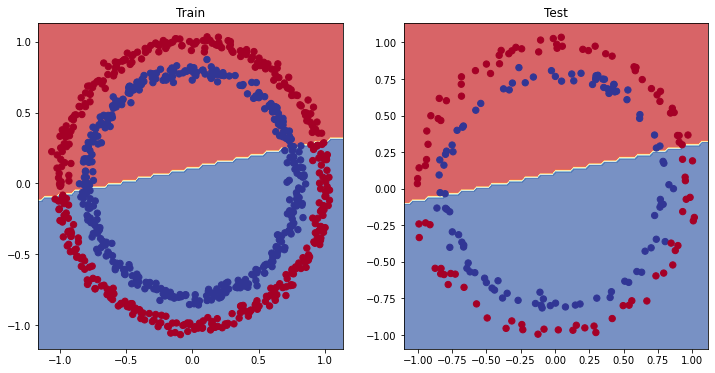

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units.
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.


And because these options are all values we (as machine learning engineers and data scientists) can change, the y are referred as **hyperparameters**

Let's try and improve our model by 
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of wrting operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1    

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr = 0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probability -> prediction labels

  # 2. Calculate the loss/ acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descnt)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  # Print out what's happenin
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00


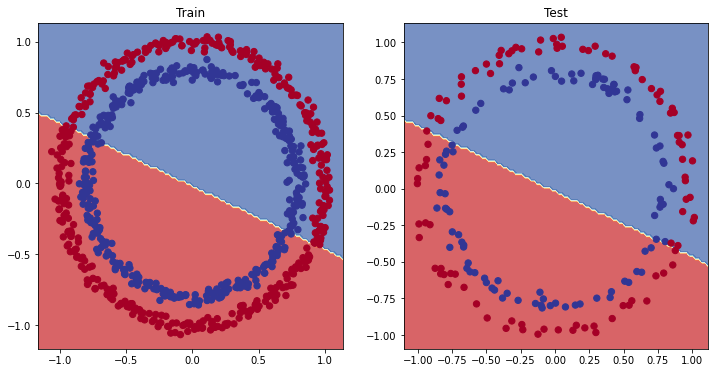

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line



One way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

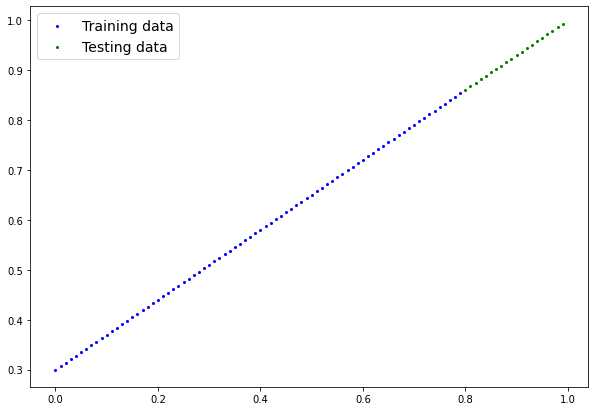

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [ ]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### 5.2 Adjusting `model_1` to fit a straight line


In [ ]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing 
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f} ")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103 
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081 
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209 
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305 
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341 
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387 
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379 
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381 
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329 
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360 


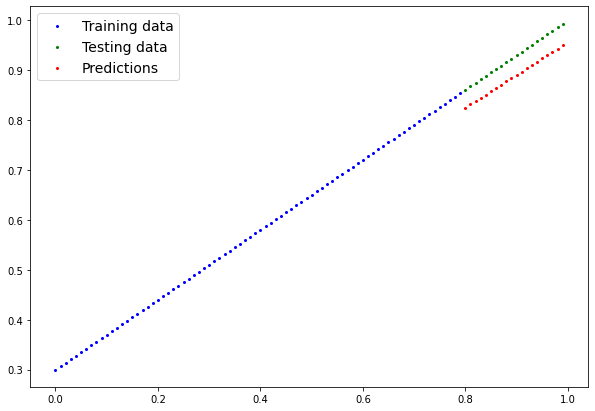

In [ ]:
# Turn on evaluation model
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(), 
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece: non-linearity



"What patterns could you draw if you were given an infinite amount of a strraight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

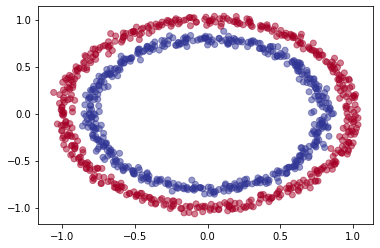

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, alpha=0.5);

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* None-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

**Using of Classification**
* spam or not spam
* creadit card = fraud or not fraud
* insurance claims = at fault or not fault

In [ ]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-l9inear activation function

  def forward(self, X):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), 
                            lr=0.1)

### 6.3 Training a model with non-linearity

In [ ]:
len(X_test), len(y_test)

(200, 200)

In [ ]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 2000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  
  # Print out what's happenin
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910 | Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894 | Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872 | Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841 | Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794 | Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729 | Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632 | Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476 | Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215 | Test Acc: 79.00%
Epoch: 1000 | Loss: 0.5682, Acc: 87.75% | Test Loss: 0.5738 | Test Acc: 86.50%
Epoch: 1100 | Loss: 0.4815, Acc: 93.50% | Test Loss: 0.4993 | Test Acc: 90.50%
Epoch: 1200 | Loss: 0.3706, Acc: 97.75% | Test Loss: 0.4059 | Te

### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

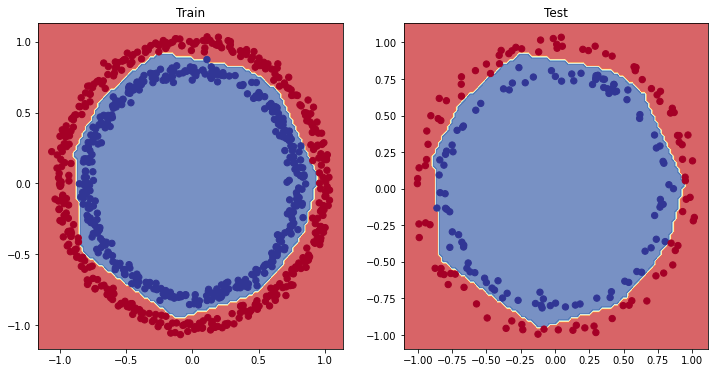

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tols to discover patterns in data and it tries to figure out patterns on its own.

And thesr tools are linear & non-linear functions.

In [ ]:
# Create a tensor 
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

**linear**

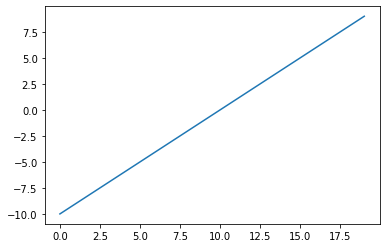

In [ ]:
# Visualize the tensor
plt.plot(A);

**ReLU**

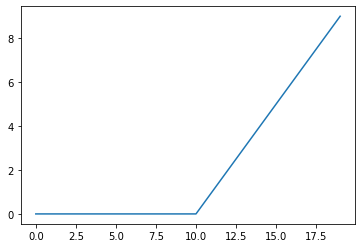

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)  

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

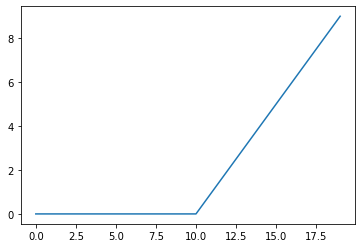

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A));

In [ ]:
# Now let's do the same for Sigmoid - https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#sigmoid
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

**Sigmoid**

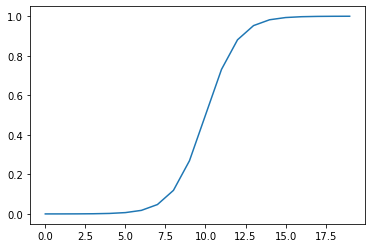

In [ ]:
plt.plot(torch.sigmoid(A));

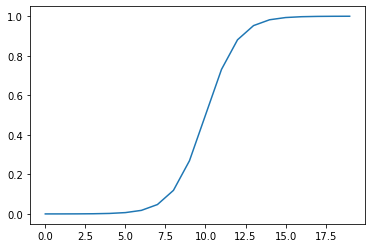

In [ ]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification


* Binary classification = one thing or another (cat vs. dog, spam vs not spam, fraud or not fraud)

* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset 

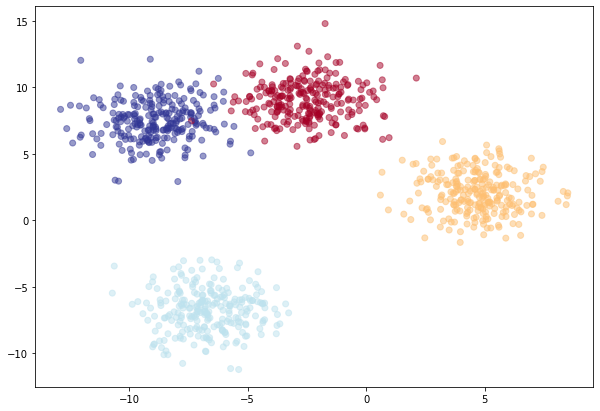

In [ ]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set the hyperparameters for dat creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu, alpha=0.5);



### 8.2 Building a  multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Building a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_unit (int): Number of hidden units betweeen layers, default 8

    Returns:
      A new class from one of which target label 

    Example:  
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )
        
  def forward(self, x):
    return self.linear_layer_stack(x)   

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification - loss function meausres how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter

### 8.4 Getting prediction probablilities for a multi-class PyTorch model

In order  to evaluate and train and test our model, we need to convert our model's outputs (logits) to predictions probabilities and then ot prediction labels. 

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probability)

In [ ]:
# Let's get some raw outputs of our model (logist)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Createing a training loop and testing loop for a multi-class PyTorch model

In [ ]:
y_blob_train.dtype

torch.int64

In [ ]:
# Fit the multi-classs model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop throught data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)
  
  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test loss: 1.0755, Test acc: 23.50%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test loss: 0.6607, Test acc: 23.50%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test loss: 0.4307, Test acc: 23.50%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test loss: 0.2451, Test acc: 23.50%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test loss: 0.1023, Test acc: 23.50%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test loss: 0.0585, Test acc: 23.50%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test loss: 0.0429, Test acc: 23.50%
Epoch: 70 | Loss: 0.0430, Acc: 99.25% | Test loss: 0.0349, Test acc: 23.50%
Epoch: 80 | Loss: 0.0384, Acc: 99.25% | Test loss: 0.0299, Test acc: 23.50%
Epoch: 90 | Loss: 0.0352, Acc: 99.25% | Test loss: 0.0266, Test acc: 23.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]  

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
# Go from pred probs to pred lables
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

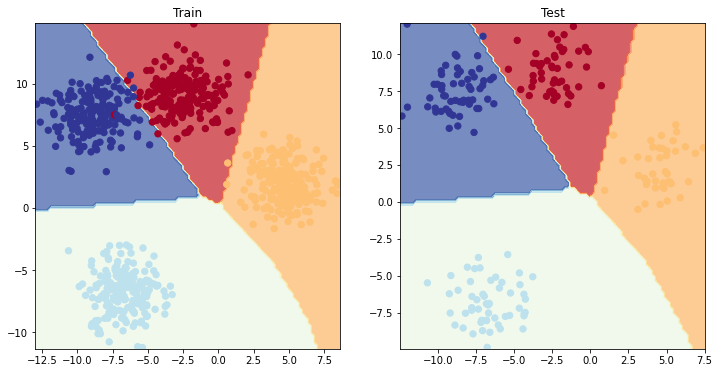

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
 $$Accuracy\:=\:\frac{tp\:+tn}{tp\:+\:tn+\:fp\:+\:fn}$$
* Precision 
 $$Precision\:=\:\frac{tp}{tp\:+\:fp}$$
* Recall
 $$Recall\:=\:\frac{tp}{tp\:+\:fn}$$
* F1-score
 $$F1-score\:=2\:\times \:\frac{precision\:\times \:recall}{precision\:+\:recall}$$
* Confusion matrix
* Classification report

See this artical for when to use precision/recall - https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/

sklearn metrics classification report- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

if you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/stable/#welcome-to-torchmetrics

<table>
  <tr>
    <th bgcolor="#FFFFFF"></th>
    <th bgcolor="#FFFFFF">Actual positive</th>
    <th bgcolor="#FFFFFF">Actual negative</th>
  </tr>
  <tr>
    <th bgcolor="#FFFFFF">Predicted positive</th>
    <td bgcolor="#90EE90"><center><b>TP</b></center></td>
    <td  bgcolor="#F5F5F5"><center><b>FP</b></center></td>
  </tr>
  <tr>
    <th bgcolor="#FFFFFF">Predicted negative</th>
    <td  bgcolor="#F5F5F5"><center><b>FN</b></center></td>
    <td bgcolor="#90EE90"><center><b>TN</b></center></td>
  </tr>
</table>

* The **last letter** tells about your prediction "Positive" or "Negative"
* The **first letter** tells if your prediction matches an actual class(reality) correctly then "True" else "False"

* Accuracy - proportion of **number of data predicted correctly** devided by total number of data

* Precision - proportion of number of positives predicted correctly devided by **number of positive predictions**

* Recall - proportion of number of positives predicted correctly devided by **number of positive cases**

* F1-Score an **average** of precision and reacll

* sensitivity - another name of  **recall**

* specificity - proportion of **number of negative predicted corrrectly** devided by **number of negative cases**

* The **ROC curve** is a graph of the **specificity** vs **1 - the senitivity** (the closer to the upper left conner, the better the performance)

* The **AUC**(Area Under the Curve) gives a general sense of how well the  model is performing.

<table>
  <tr>
    <th colspan="4"><b>Classification evaluation methods</b></th>
  </tr>
  <tr>
    <th>Metric Name</th>
    <th>Metric Formula</th>
    <th>Code</th>
    <th>When to use</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td><b>Accuracy</b> = (tp + tn)/(tp + tn + fp + fn)</td>
    <td>torchmetrics.Accuracy()</br>or</br>sklearn.metrics.accuracy_score()</td>
    <td>Default metric for classification problems.</br>Not the best for imbalanced classes.</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td><b>Precision</b> = tp/(tp + fp)</td>
    <td>torchmetrics.Precision()</br>or</br>sklearn.metrics.precision_score()</td>
    <td>Higher precision leads to less false positives.</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td><b>Recall</b>= tp/(tp + fn)</td>
    <td>torchmetrics.Recall()</br>or</br>sklearn.metrics.recall_score()</td>
    <td>Higher recall leads to less false negatives.</td>
  </tr>
  <tr>
    <td>F1-score</td>
    <td><b>F1-score</b>=2X(precision X recall)/(precision + recall)</td>
    <td>torchmetrics.F1Score()</br>or</br>sklearn.metrics.f1_score()</td>
    <td>Combination of precision and recall,</br>usually a good overall metric for</br>a classification model.</td>
  </tr>
  <tr>
    <td>Confusionmatrix</td>
    <td>NA</td>
    <td>torchmetrics.ConfusionMatrix()</td>
    <td>When comparing predictions to truth labels</br>to see where model gets confused. Can be</br>hard to use with large numbers of classes </td>
  </tr>
  <tr>
    <td colspan="4">tp: true positive, tn: true negative, fp: false positive, fn: false negative</td>
  </tr>
</table>

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy().to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

#<center><b>Chapter 3 - Computer Vision & Convolutional Neural Networks with</b></center>

What is a computer vision problems?

Example computer vision problems
  - Binary classification (one thing or another)
    - Ex. A model that understands what the photo look like such as steak or pizza
  - Multiclass classification (more than one thing or another)
    - Ex. A model that understands more foods such as sushi, stake or pizza and so on..
  - Object detection to find the object in a picture
    - Ex. detecting thift, shoplifter or burglary on security camera 
  - Segmentation to find different sections in the image
    - Ex. for professional protography to segment different portion in an image

What we're going to cover?

* Getting a vision dataset to work iwth using `torchvision.datasets`
* Architecture of a **convolutional neural network** (CNN) with PyTorch
* An end-to-end multi-class image classification problem
* Setps in modelling with **CNNs** in PyTorch
  * Creating a CNN model with PyTorch
  * Picking a loss and optimizer
  * Training a PyTorch computer vision model
  * Evaluating a model


**covert image** (image is huge numbers of pixels togehter, each pixel comprise of major light-color RGB that can make many different colors) each pixel [how much red, how much green, how much blue] **into tensor** then put in **Machine Learning Algorithm** (Convolutional neural network(CNN) then predict an **output** to many classes you want

<table>
  <tr>
    <th colspan="3">Architecture of a CNN</th>
  </tr>
  <tr>
    <th>Hyperparamether/Layer type</th>
    <th>What does it do?</th>
    <th>Typical values</th>
  </tr>
  <tr>
    <td>Input image(s)</td>
    <td>Target images you'd like to discover patterns in</td>
    <td>Whatever you can take a photo (or video) of</td>
  </tr>
  <tr>
    <td>Input layer</td>
    <td>Takes in target images and preprocesses them for further layers</td>
    <td>input_shape = [batch_size, image_height, image_width, color_channedls] (channels last) or</br> input_shape = [batch_size, color_channels, image_height, image_width] (channels first)</td>
  </tr>
  <tr>
    <td>Convolution layer</td>
    <td>Extracts/ learn the most important features from target images</td>
    <td>Multiple, can create with torch.nn.ConvXd() (X can be multiple values)</td>
  </tr>
  <tr>
    <td>Hidden activation/</br>non-linear activation</td>
    <td>Adds non-linearity to learned features</br>(non-straight lines)</td>
    <td>Usually ReLU (torch.nn.ReLU()), though can be many more</td>
  </tr>
  <tr>
    <td>Pooling layer</td>
    <td>Reduces the dimensionality of learned image features</td>
    <td>Max(torch.nn.MaxPool2d()) or Average(torch.nn.AvgPool2d())</td>
  </tr>
  <tr>
    <td>Output layer/linear layer</td>
    <td>Takes learned features and outputs them in shape of  target labels</td>
    <td>torch.nn.Linear(out_features=[number_of_classes]) (e.g. 3 for pizza, stake or shushi)</td>
  </tr>
  <tr>
    <td>Output activation</td>
    <td>Converts output logits to prediction probabilities</td>
    <td>torch.sigmoid() (binary classification) or torch.softmax() (multi-class classification)</td>
  </tr>
</table>

## 0. Computer vision libaries in PyTorch


* [`torchvision`](https://pytorch.org/vision/stable/index.html#torchvision)
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data to be suitable for youe with an ML model
* `torchvision.utils.data.Dataset` - Base dataset class for PyTorch.
* `torchvision.utils.data.DataLoader` - Creates a Python iterable over a dataset


transforming and augmenting images - https://pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images

In [ ]:
# Import PyTorch
import torch
from torch import nn 

# Import torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


## 1. Getting a dataset


The dataset we'll be using is FashionMNIST from torchvision.dataset

There are many built-in datasets provided for more information check in - https://pytorch.org/vision/stable/datasets.html#datasets

In [ ]:
#  Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want to training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transfrom the data
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


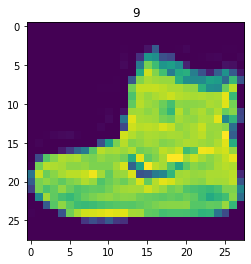

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

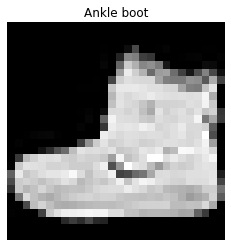

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

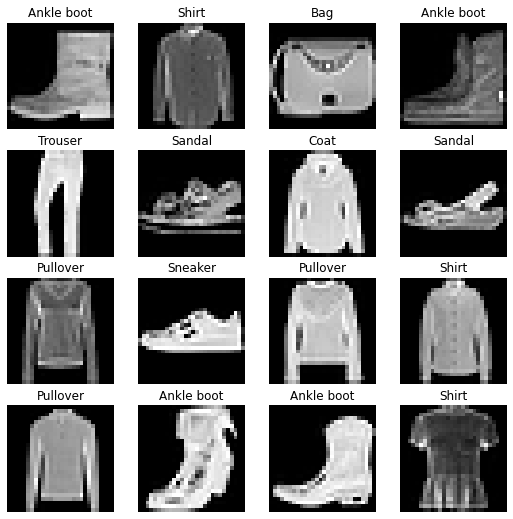

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

Do you think these items of clothing (images) could be modelled with pure **linear lines?** or do you think we'll need **non-linearities?**

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our dat is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches). 

Why would do this?

1. It is more computationally efficient, as in, your computing hardware might not be able to look (store in memory) at 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to updatae its gradients per epoch.


For more on mini-batches, see here: https://www.youtube.com/watch?v=l4lSUAcvHFs

Data Loader : https://pytorch.org/docs/stable/data.html#module-torch.utils.data

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb734300910>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb7343008d0>)

In [ ]:
# Let's check out what what we've created
print(f"DataLoaders {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders (<torch.utils.data.dataloader.DataLoader object at 0x7fb734300910>, <torch.utils.data.dataloader.DataLoader object at 0x7fb7343008d0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# Cheack out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


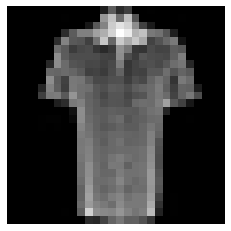

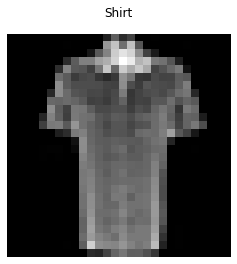

In [ ]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis(False)
plt.matshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a basline model

When starting to build a series of machine learning modelling experiments, it's bast practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequence models/experiments.

In other words: start simply and add complexity when necessary.

flatten layer : https://pytorch.org/docs/stable/generated/torch.flatten.html#torch-flatten

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
X = train_features_batch[0]

# Flatten the sample
output = flatten_model(X) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {X.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width") # because linear model can only handel a single vector input

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, X):
    return self.layer_stack(X)

In [ ]:

torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for ever class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments


Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs 

timer - https://docs.python.org/3/library/timeit.html#timeit.default_timer

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, 
                     end: float, 
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.938000008929521e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the  train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time is all (for fun).

tqdm: https://github.com/tqdm/tqdm

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training 
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  #  Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing 
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    
    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 30.108 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

### 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results
          

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Buiding a better model with non-linearity

We learned about the power of non-linearity in Chapter 2

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, 
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU(),
  )

  def forward(self, X: torch.Tensor):
    return self.layer_stack(X)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flattern after our  28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's availble

next(model_1.parameters()).device      

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)


### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* trainng loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on targer device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss  and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (updata the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference model context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
--------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
--------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Train time on cuda: 33.376 seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
# Train time on CPU
total_train_time_model_0

30.108476992999385

**Note:** Sometimes, depending on your data/hardware you might find that youf model trains faster on CPU than GPU. 

Why is this?

1. It could be that he overhead for copying data/model to and from the GPU outweights the copute benefits offered by the GPU. 
2. The hardware you're using has a better CPU in terms compute capability than GPU.

For more on how to make your models compute faster, see here:https://horace.io/brrr_intro.html

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  
  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


In [ ]:
# Get model_1 results dictionary 
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)



CNN's are also known convNets.

CNN's are known for their capabilities to find patterns in visual data.

* To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

* VGG : https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/

* 10 CNN Architectures : https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d

* Conv2d : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

* MaxPool2d : https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architechture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this...
                  out_features=output_shape)
    )

  def forward(self, X):
    X = self.conv_block_1(X)
    # print(f"Outputshape of conv_block_1: {X.shape}")
    X = self.conv_block_2(X)
    # print(f"Outputshape of conv_block_2: {X.shape}")
    X = self.classifier(X)
    # print(f"Outputshape of classifier: {X.shape}")
    return X

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

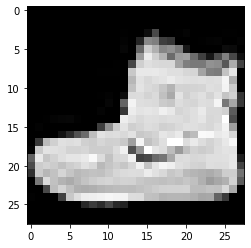

In [ ]:
plt.imshow(image.squeeze(), cmap="gray");

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                    

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here-https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#conv2d

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output, conv_output.shape

(tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
          [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
          [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
          ...,
          [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
          [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
          [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],
 
         [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
          [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
          [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
          ...,
          [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
          [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
          [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],
 
         [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
          [-0.5791,  0.4414,

In [ ]:
torch.__version__

'1.12.1+cu113'

### 7.2 Stepping through `nn.MaxPool2d`

MaxPool2d : https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

ย่อภาพให้เล็กลงโดยการ ดึงค่าที่มากที่สุดจาก pool 

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after gong through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after gong through conv_layer(): torch.Size([1, 10, 64, 64])
shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensors shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensors shape: torch.Size([1, 1, 1, 1])


In [ ]:
"""
self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=hidden_units*Num*Num,
              out_features=output_shape)
    )
"""    

'\nself.conv_block_1 = nn.Sequential(\n        nn.Conv2d(in_channels=input_shape,\n                  out_channels=hidden_units,\n                  kernel_size=3,\n                  stride=1,\n                  padding=1),\n        nn.ReLU(),\n        nn.Conv2d(in_channels=hidden_units,\n                  out_channels=hidden_units,\n                  kernel_size=3,\n                  stride=1,\n                  padding=1),\n        nn.ReLU(),\n        nn.MaxPool2d(kernel_size=2)\n    )\n    self.conv_block_2 = nn.Sequential(\n        nn.Conv2d(in_channels=hidden_units,\n                  out_channels=hidden_units,\n                  kernel_size=3,\n                  stride=1,\n                  padding=1),\n        nn.ReLU(),\n        nn.Conv2d(in_channels=hidden_units,\n                  out_channels=hidden_units,\n                  kernel_size=3,\n                  stride=1,\n                  padding=1),\n        nn.ReLU(),\n        nn.MaxPool2d(kernel_size=2)\n    )\n    self.class



<table> 
  <tr>
    <th colspan="17"><b>CNN Explainer model</b></th>
  </tr>
  <tr>
    <th colspan="2"></th>
    <th colspan="6" bgcolor="#6495ED">self.conv_block_1</th>
    <th></th>
    <th colspan="6" bgcolor="#9370DB">self.conv_block_2</th>
    <th colspan="2"></th>
  <tr>
    <th bgcolor="#228B22">Input layer</th>
    <th></th>
    <th bgcolor="#ADFF2F">nn.Conv2d</th>
    <th bgcolor="#7FFFD4">nn.ReLU()</th>
    <th></th>
    <th bgcolor="#ADFF2F">nn.Conv2d</th>
    <th bgcolor="	#7FFFD4">nn.ReLU()</th>
    <th bgcolor="#FFFF00">nn.MaxPool2d</th>
    <th></th>
    <th bgcolor="#ADFF2F">nn.Conv2d</th>
    <th bgcolor="	#7FFFD4">nn.ReLU()</th>
    <th></th>
    <th bgcolor="#ADFF2F">nn.Conv2d</th>
    <th bgcolor="	#7FFFD4">nn.ReLU()</th>
    <th bgcolor="#FFFF00">nn.MaxPool2d</th>
    <th></th>
    <th bgcolor="#FF0000">Output layer</th>
  </tr>
</table>


<table>
  <tr>
    <th colspan="3"><b>Breakdown of torch.nn.Conv2d layer</b></th>
  </tr>
  <tr>
    <td colspan="3"><b>Example code:</b>  torch.nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3, 3), stride=(1, 1), padding=0)<br /><b>Example 2(same as above):</b> torch.nnConv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)</td>
  </tr>
  <tr>
    <th>Hyperparameter name</th>
    <th>What does it do?</th>
    <th>Typical values</th>
  </tr>
  <tr>
    <td>in_channels</td>
    <td>Defines the number of input channels of the input data</td>
    <td>1 (grayscale), 3(RGB color images)</td>
  </tr>
  <tr>
    <td>out_channels</td>
    <td>Defines the number output channels of the layer <br />(could also be called hidden units).</td>
    <td>10, 128, 256, 512</td>
  </tr>
  <tr>
    <td>Kernel_size< br >(also referred to as filter size)</td>
    <td>Determines the shape of the kernel (sliding windows) over the input.</td>
    <td>3, 5, 7,<br />(lowers values learn smaller features,<br />higher values learn larger features)</td>
  </tr>
  <tr>
    <td>stride</td>
    <td>The number of steps a filter takes across an image at a time</br>(e.g. if strides=1, a filter move across an image 1 pixel at a time).</td>
    <td>1(default), 2</td>
  </tr>
  <tr>
    <td>padding</td>
    <td>Pads the target tensor with zeroes (if "same") to preserve input shape.</br>Or leave in the target tensor as is (if "valid"), lowering output shape.</td>
    <td>0, 1, "same", "valid"</td>
  </tr>
</table>




### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3 
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end=train_time_end_model_2,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.59442 | Train acc: 78.35%
Test loss: 0.39530 | Test acc: 85.99%
Train time on cuda: 10.201 seconds
Epoch: 1
----
Train loss: 0.36663 | Train acc: 86.77%
Test loss: 0.35761 | Test acc: 86.92%
Train time on cuda: 20.128 seconds
Epoch: 2
----
Train loss: 0.32656 | Train acc: 88.12%
Test loss: 0.32894 | Test acc: 88.07%
Train time on cuda: 30.054 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32894134521484375,
 'model_acc': 88.06908945686901}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.328941,88.069089


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results                                    

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,30.108477
1,FashionMNISTModelV1,0.685001,75.019968,33.376431
2,FashionMNISTModelV2,0.328941,88.069089,30.053973


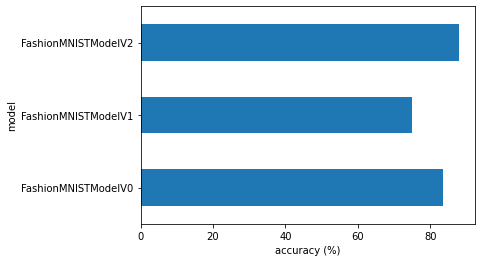

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability(logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

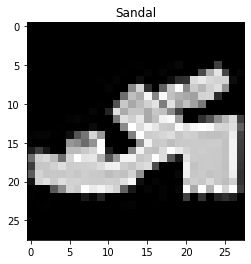

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray");
plt.title(class_names[test_labels[0]]);

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2, 
                              data=test_samples)

# View first two prediction probabilities 
pred_probs[:2]

tensor([[5.6500e-08, 1.0212e-08, 5.9339e-08, 2.6183e-07, 2.8765e-08, 9.9988e-01,
         2.8600e-07, 8.5627e-06, 3.5486e-05, 7.3833e-05],
        [1.8035e-01, 5.0113e-01, 1.4346e-03, 9.6822e-02, 5.2535e-02, 5.7873e-05,
         1.6483e-01, 5.6513e-04, 2.1689e-03, 1.0853e-04]])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes 

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

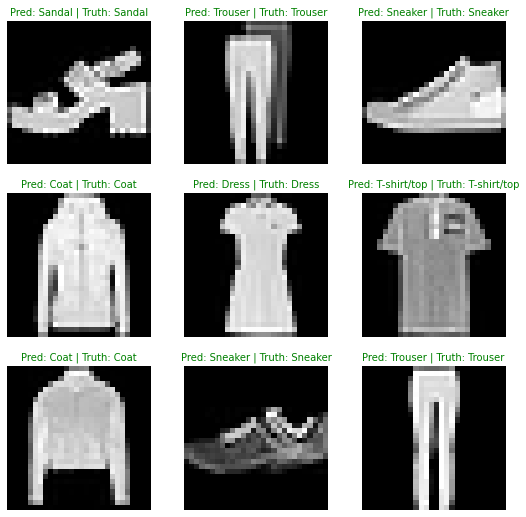

In [ ]:
# Plot predictions 
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the 
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#id3
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  ! pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.21.0


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

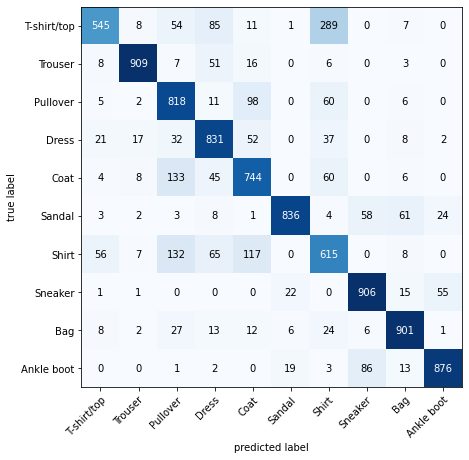

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load best performing model



In [ ]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_version_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_version_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names)) 

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32894134521484375,
 'model_acc': 88.06908945686901}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32894134521484375,
 'model_acc': 88.06908945686901}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              # atol=le-02, # adject absolute tolerance to check the model result 
              )

tensor(True)

#<center><b>Chapter 4 - Custom Datasets</b></center>

<table>
  <tr>
    <th colspan="2"><b>PyTorch Domain Libraries</b></th>
  </tr>
  <tr>
    <th>Problem Space</th>
    <th>Pre-built Datasets and Functions</th>
  </tr>
  <tr>
    <td>Vision</td>
    <td>torchvision.datasets</td>
  </tr>
  <tr>
    <td>Text</td>
    <td>torchtext.datasets</td>
  </tr>
  <tr>
    <td>Audio</td>
    <td>torchaudio.datasets</td>
  </tr>
  <tr>
    <td>Recommendation system</td>
    <td>torchrec.datasets</td>
  </tr>
  <tr>
    <td>Bonus</td>
    <td>torchvData*</td>
  </tr>
  <tr>
    <td colspan="2">*TorchData contains many different helper function<br />for loading data and is currently in beta as of April 2022.</td>
  </tr>
</table>

**What we're going to cover?**
* Getting a **custom dataset** with PyTorch
* **Becoming one with the data** (preparing and visualising)
* **Transforming data** for use with a model
* **Loading custom data** with pre-built functions and custom functions
* Building **FoodVision Mini** to classify  🍕 (pizza), 🥩 (stake) ,🍣 (sushi) images
* Comparing models with and without **data augmentation**
* **Making predictions** on custom data

We've used some datasets with PyTorch before. But how do you **get your own data** into PyTorch?

One of the ways to do so is via: **custom datasets.**

**Domain libraries**
Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions.

## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# Note: PyTorch 1.10.0 + is required for this course
torch.__version__

'1.12.1+cu113'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
 ! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## 1. Get data

Our dataset is a subset of the Food101 dataset.

Food 101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, ~25 testing).

Why do this?

When starting out ML projects, it's important to try thisng on a small scale and then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.


* how to make your own custom data set: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb

* the style of prebuilt dataset: https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#imagefolder

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists...skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, stake and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


## 2. Becoming one with the data (data preparation and data exploration)

In [5]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path): 
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [7]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image 

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image iwth Python's PIL
5. We'll then show the image and print metadata

In [8]:
image_path

PosixPath('data/pizza_steak_sushi')

In [9]:
# /content/data/pizza_steak_sushi

Random image path: data/pizza_steak_sushi/train/pizza/1660415.jpg
Image class: pizza
Image height: 512
Image width: 442


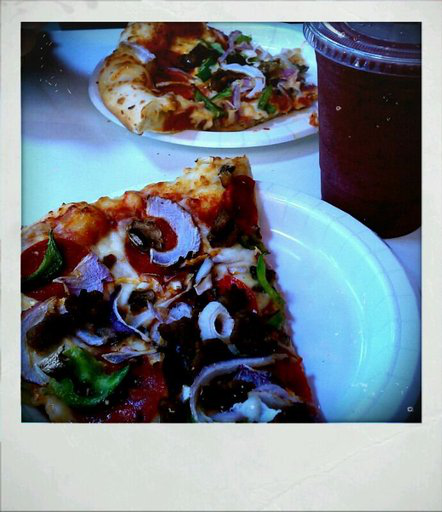

In [10]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
# print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory whree the image is stored)
image_class = random_image_path.parent.stem
# print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5.Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

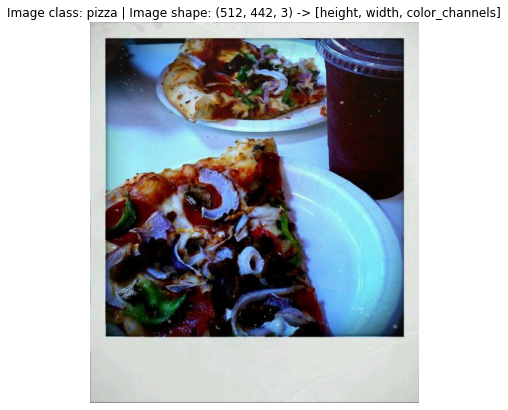

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [12]:
img_as_array

array([[[144, 143, 138],
        [165, 164, 159],
        [176, 177, 171],
        ...,
        [190, 182, 180],
        [191, 181, 180],
        [187, 177, 175]],

       [[155, 154, 149],
        [177, 176, 171],
        [189, 190, 184],
        ...,
        [209, 204, 201],
        [209, 201, 199],
        [205, 197, 194]],

       [[158, 157, 152],
        [180, 179, 174],
        [192, 193, 187],
        ...,
        [217, 213, 210],
        [216, 212, 209],
        [212, 208, 205]],

       ...,

       [[159, 165, 161],
        [182, 188, 184],
        [196, 202, 198],
        ...,
        [203, 208, 204],
        [201, 206, 202],
        [198, 203, 199]],

       [[147, 153, 149],
        [169, 175, 171],
        [181, 187, 183],
        ...,
        [184, 189, 185],
        [184, 189, 185],
        [180, 185, 181]],

       [[100, 106, 102],
        [120, 126, 122],
        [131, 137, 133],
        ...,
        [128, 133, 129],
        [130, 135, 131],
        [127, 132, 128]]

## 3. Transforming data

Before we can use our image data with PyTorch: 
1. Turn your target data into tensors (in our case, numerical representation images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`.

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

Transforms help you get your images ready to be used with a model/perform data augmentation. - https://pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images

In [14]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [15]:
after_transforms = data_transform(img)

after_transforms.shape, after_transforms.dtype,

(torch.Size([3, 64, 64]), torch.float32)

In [16]:
data_transform(img)

tensor([[[0.8196, 0.8314, 0.8353,  ..., 0.7765, 0.7765, 0.7373],
         [0.8392, 0.8431, 0.8471,  ..., 0.7961, 0.7922, 0.7686],
         [0.8431, 0.8471, 0.8235,  ..., 0.7804, 0.7961, 0.7765],
         ...,
         [0.8000, 0.8118, 0.8157,  ..., 0.7804, 0.7765, 0.7608],
         [0.7922, 0.8000, 0.8078,  ..., 0.7765, 0.7765, 0.7647],
         [0.7529, 0.7608, 0.7725,  ..., 0.7490, 0.7412, 0.7216]],

        [[0.8235, 0.8392, 0.8510,  ..., 0.7843, 0.7843, 0.7451],
         [0.8471, 0.8588, 0.8667,  ..., 0.8039, 0.8118, 0.7843],
         [0.8588, 0.8627, 0.8392,  ..., 0.7961, 0.8157, 0.7961],
         ...,
         [0.8196, 0.8314, 0.8353,  ..., 0.8078, 0.8039, 0.7843],
         [0.8118, 0.8235, 0.8275,  ..., 0.8039, 0.7961, 0.7725],
         [0.7765, 0.7843, 0.7922,  ..., 0.7686, 0.7608, 0.7412]],

        [[0.8118, 0.8275, 0.8392,  ..., 0.7686, 0.7686, 0.7216],
         [0.8353, 0.8392, 0.8471,  ..., 0.7922, 0.7922, 0.7608],
         [0.8392, 0.8431, 0.8314,  ..., 0.7843, 0.8000, 0.

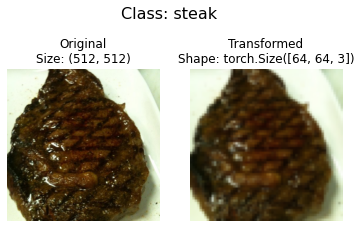

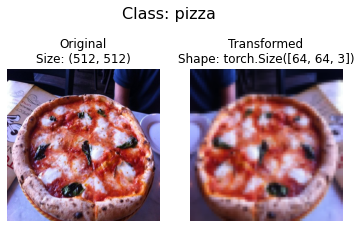

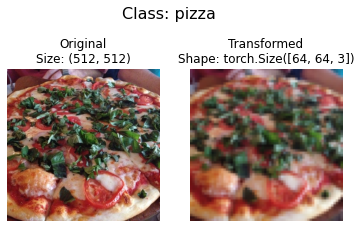

In [17]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms them 
  then plots the original vs the transformed version. 
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (W, H, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)


## 4. Option 1: Loading image data using `ImageFolder`

We can load image classification data using `torchvision.data.sets.ImageFolder` -
https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html#imagefolder

In [18]:
# Use ImageFolder to create dataset(s)
from torchvision  import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target


test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [19]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [20]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
# check the lengths of our dataset.
len(train_data), len(test_data)

(225, 75)

In [23]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [24]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

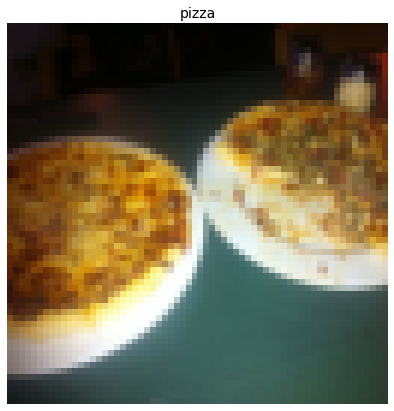

In [25]:
# Rearrae the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into `DataLoader`'s



A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can customize the `batch_size` so our model can see `batch_size` image at a time.

In [26]:
import os
os.cpu_count()

2

In [27]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fea426202d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fea42620290>)

In [28]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [29]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


## 5 Option 2: Loading Image Data with a Custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions 

Cons:
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` of ten results in us writing more code, which could be prone to errors or performance issues

All custom datasets in PyTorch, often subclass - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset


In [30]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [31]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class name using `os.scandir()` to tranverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them.

In [32]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))]) 
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [33]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [34]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory. """
  # 1. Get the class names by scanning the target directory 
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")
  
  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [35]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

to create our own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
 * paths - paths of our images
 * transform - the transform we'd like to use
 * classes - a list of the target classes
 * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image 
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index
                                          

In [36]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self, 
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transforms
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)
  
  # 4. Create a funciton to load images
  def load_image(self, index: int) -> Image.Image:
    """Opens an image via a path and returns it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    """Returns the total number of samples."""
    return len(self.paths)
  
  # 6.Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """Returns one sample of data, data and label(X, y)."""
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data label (X, y)
    else:
      return img, class_idx # return untransformed image and label


In [37]:
# Create a transform 
from torchvision import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()
])

In [38]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [39]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fea425aff90>,
 <__main__.ImageFolderCustom at 0x7fea425affd0>)

In [40]:
len(train_data), len(train_data_custom)

(225, 225)

In [41]:
len(test_data), len(test_data_custom)

(75, 75)

In [42]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [43]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [44]:
# check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters suh as class names many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of image to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib (HWC).

In [45]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None, 
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too hight
  if n > 10:
    n = 10 
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display")
  
  # 3. Set the seed 
  if seed:
    random.seed(seed)
  
  # 4. Get random sample indexes 
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Looop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting 
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

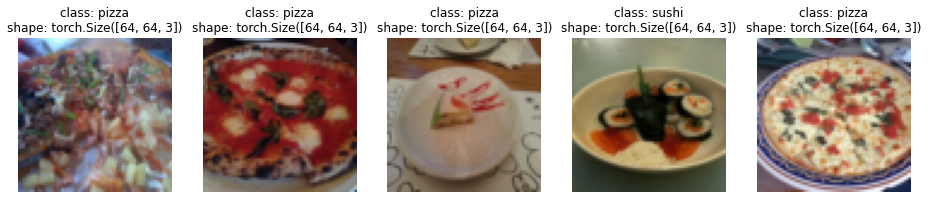

In [46]:
# Display random images from the ImageFolder create Dataset
display_random_images(train_data, 
                      n=5,
                      classes=class_names,
                      seed=None)

For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display


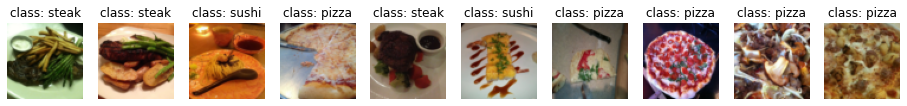

In [47]:
# Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=None)

### 5.4 Turn custom loaded images into `DataLoader`'s

In [48]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, 
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom, 
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fea41021210>,
 <torch.utils.data.dataloader.DataLoader at 0x7fea41021d90>)

In [49]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data. 

In the case of image data, this may mean applying various image transformations to the training images.

Data augmentation: https://en.wikipedia.org/wiki/Data_augmentation

This practice hopefully results in a model that's more generalizable to unseen data.

let's take a look at one particular type of data augmentaion used to train PyTorch vision models to state of the art levels...

Blog post: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/


Let's look at trivialaugment - https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#trivialaugmentwide

Trivial augment: https://arxiv.org/abs/2103.10158

ให้โมเดลเรียนรู้ภาพ มองต่างมุม ต่างสี

In [50]:
from torchvision import transforms 

train_transform = transforms.Compose([
                                       transforms.Resize(size=(224, 224)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()
])

test_transform = transforms.Compose([
                                    transforms.Resize(size=(224, 224)),
                                    transforms.ToTensor()
])

In [51]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/648055.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg')]

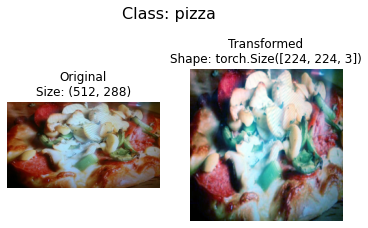

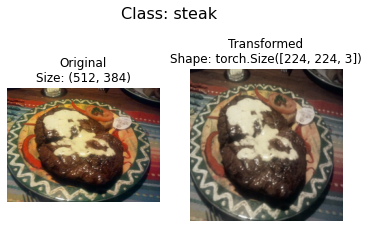

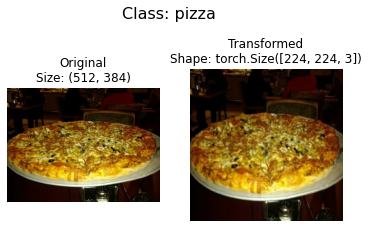

In [52]:
# Plot random transformed images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n = 3,
    seed=None
)

## 7. Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architecture from the CNN Explainer website:

https://poloclub.github.io/cnn-explainer/

### 7.1 Creating transforms and loading data from Model 0

In [53]:
# Create simple transform
simple_transform = transforms.Compose([
                                      transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()                                       
])


In [54]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

#  Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 7.2 Create TinyVGG model class

In [55]:
class TinyVGG(nn.Module):
  """Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, 
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)  # default stride value is same as kernal_size
    )
    self.conv_block_2 =nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, X):
    X = self.conv_block_1(X)
    # print(X.shape)
    X = self.conv_block_2(X)
    # print(X.shape)
    X = self.classifier(X)
    return X
    return self.classifier(self.conv_block_2(self.conv_block_1(X))) # benefits for "operator fusion": https://horace.io/brrr_intro.html

In [56]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)

In [57]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [58]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6318e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7292e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4456e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5022e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4218e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8256e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

### 7.4 Use `torchinfo` to get an idea of the shape gong through our model

Torchinfo: https://github.com/TylerYep/torchinfo#how-to-use

In [59]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  ! pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test loops functions

* `train_step()`- takes in a model and dataloader and trains the model on the dataloader.
* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [60]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)  # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [61]:
# Create test_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
  
  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### 7.6 Creating a `train()` funciton to combine `train_step()` and `test_step()`

In [62]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    
    # 4.  Print out what's happenin'
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary 
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### 7.7 Train and evaluate model 0

In [71]:
# Set random seeds 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 6

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer  
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                              lr=0.001)     

# Start the timer
from timeit import default_timer as timer   
start_time = timer()   

# train model
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} second")

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Test acc: 0.3116
Epoch: 1 | Train loss: 1.0995 | Train acc: 0.3320 | Test loss: 1.0698 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0863 | Train acc: 0.4922 | Test loss: 1.0800 | Test acc: 0.5227
Epoch: 3 | Train loss: 1.0826 | Train acc: 0.4102 | Test loss: 1.0599 | Test acc: 0.5729
Epoch: 4 | Train loss: 1.0630 | Train acc: 0.4141 | Test loss: 1.0609 | Test acc: 0.5540
Epoch: 5 | Train loss: 1.0211 | Train acc: 0.4609 | Test loss: 1.0063 | Test acc: 0.4820
Total training time: 9.376 second


In [65]:
model_0_results

{'train_loss': [1.1063424497842789,
  1.0994888246059418,
  1.0862806141376495,
  1.0825903862714767,
  1.062969759106636,
  1.0210711359977722,
  0.9660142138600349,
  0.9352072849869728,
  0.9194852598011494,
  0.9983102232217789],
 'train_acc': [0.3046875,
  0.33203125,
  0.4921875,
  0.41015625,
  0.4140625,
  0.4609375,
  0.4296875,
  0.5859375,
  0.59765625,
  0.453125],
 'test_loss': [1.09831436475118,
  1.069840908050537,
  1.0800189574559529,
  1.0598591168721516,
  1.060903509457906,
  1.0063109596570332,
  0.9271235863367716,
  1.0247154434521992,
  1.0697904229164124,
  1.0424713691075642],
 'test_acc': [0.31155303030303033,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728,
  0.48200757575757575,
  0.6041666666666666,
  0.49526515151515155,
  0.35321969696969696,
  0.393939393939394]}

### 7.8 Plot the loss curves of Model 0



A **loss curve** is a way of tracking your model's progress over time.
A good guide for different loss curves can be seen here: https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

In [72]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [73]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how may epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

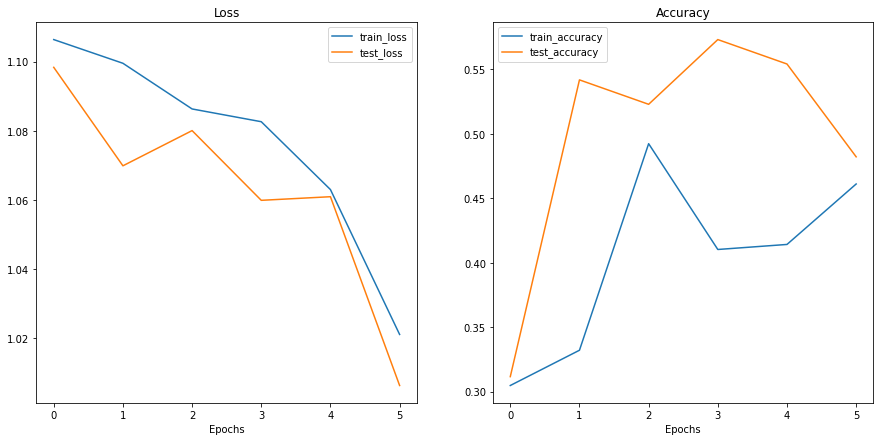

In [74]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

**A loss curve is one of the most helpful ways to troubleshoot a model.**

* Underfitting is when the model lossed on the training and **test data set could be lower** น่าจะลงได้มากกว่านี้นะ
* Overfitting would be when you're training loss is lower than your testing loss. When your model is essentially learing the training data too well. that means the loss goes down on the training data set which is typically a good thing. however this learning is not reflected in the testing data set. So your model is essentially memorizing patterns in the training data set that don't generalize well to the test data set. จำได้หมดทุกอย่างแต่เอาไปใช้สอบไม่ได้

**Ideal**:  trying to reduce underfitting make loss lower also reduce overfitting the both

<table>
  <tr>
    <th colspan="2"><h4><b>Dealing with overfitting</b></h4></th>
  </tr>
  <tr>
    <th>Method to improve a model<br />(reduce overfitting)</th>
    <th>What does it do?</th>
  </tr>
  <tr>
    <td>Get more data</td>
    <td>Gives a model more of a chance to learn patterns between samples<br /> (e.g. if a model is performing poorly on images of pizza, show it more images of pizza).</td>
  </tr>
  <tr>
    <td>Data augmentation</td>
    <td>Increase the diversity of your training daaset without collecting more data<br />(e.g. take yoru photos of and randomly rotate them 30°)<br /> increased diversity forces a model to learn more generalisation patterns.</td>
  </tr>
  <tr>
    <td>Better data</td>
    <td>Not all data samples are created equally. Removing poor samples from or<br />adding better samples to your dataset can improve your model's performance.</td>
  </tr>
  <tr>
    <td>Use transfer learning</td>
    <td>Take a model's pre-learned patterns from one problem and tweak them to <br />suit your own problems. For example, take a model trained on pictures of <br />cars to recognize pictures of trucks.</td>
  </tr>
  <tr>
    <td>Simplify your model</td>
    <td>If the current model is already overfitting the training data, it may be <br />too complicated of a model.This means it's learning the patterns of <br />the data too well and isn't able to generalize well to unseen data.<br /> One way to simplify a model is to reduce the number of layers <br />it uses or to reduce the number of hidden units in each layer.</td>
  </tr>
  <tr>
    <td>Use learning rate decay</td>
    <td>The idea here is to slowly decrease the learning rate as a model trains. <br />This is akin to reaching for a coin at the back of a coach. The closr you get,<br /> the smaller your steps.The same with the learning rate, the closer you get to <br />convergence, the smaller you'll want your weight updates to be.</td>
  </tr>
  <tr>
    <td>Use early stopping</td>
    <td>Early stopping stops model training "before" it begins to overfit. As in,<br />say the model's loss has stopped decreasing for the past 10 epochs<br />(this number is arbitrary), you may want to stop the model training here<br /> and go with the model weights that had the lowest loss(10 epcohs prior). </td>
  </tr>
  <tr>
    <td></td>
    <td></td>
  </tr>
</table>

<table>
  <tr>
    <th colspan="2"><h4><b>Dealing with underfitting</b></h4></th>
  </tr>
  <tr>
    <th>Method to improve a model<br />(reduce underfitting)</th>
    <th>What does it do?</th>
  </tr>
  <tr>
    <td>Add more layers/units to your model</td>
    <td>If your model is underfitting, it may not have enough capability to "learn"<br /> the required patterns/weights/representations of the data to be predictive.<br />One way to add more predictive power to your model is to increase<br />the number of hidden layers/units within those layers.</td>
  </tr>
  <tr>
    <td>Tweak the learning rate </td>
    <td>Perhaps your model's learning rate is too high to begin with.And it's tryig to<br />update its weights each epoch too much, in turn not learning anything.<br />In this case, you might lower the learning rate and see what happens</td>
  </tr>
  <tr>
    <td>Train for longer</td>
    <td>Sometimes a model just needs more time to learn representations of data<br />If you find in your smaller experiments your model isn't learning anything,<br />perhaps leaving it train for a more epochs may result in better performance.</td>
  </tr>
  <tr>
    <td>Use transfer learning</td>
    <td>Take a model's pre-learned patterns from one problem and tweak them to <br />suit your own problems. For example, take a model trained on pictures of <br />cars to recognize pictures of trucks.</td>
  </tr>
  <tr>
    <td>Use less regularization</td>
    <td>Perhaps your model is underfitting because you're trying to prevent overfitting<br />too much. Holding back on regularization techniques can help your model fit<br />the data better.</td>
  </tr>
</table>